In [3]:
import re
import pandas as pd 
import numpy as np

In [4]:
f = open('Document from ....txt','r',encoding='utf-8')

In [5]:
data = f.read()

In [6]:
print(data)

8/12/22, 14:12 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
8/13/22, 12:00 - +91 6353 978 704: ,Dear Students,
This is Shubham Solanki from B.Tech Mechanical. Me and my team are pleased to present to you my workshop on Software Blender. Blender is one of the largest open-source software for Graphic Designing, 3D Animation, Product Designing, Simulation, Game Developing and many more.
This open source giant has a fair market share to work with renowned creators, with a strong community support. Participants will be learning the basics of this workshop and learning how to create their very own simulated video. The major Seven topics to be covered are mentioned in the following slide. At the end of the workshop, participants will create their very own 3D video in the software themselves.
For more details you may contact the team via.
         (M) : 9773186998
          E-mail: 20bt02d019@gsfcu

In [7]:
#regular expression for date and time
#this works only 24 hours format
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [8]:
messages = re.split(pattern,data)[1:]
#adding [1:]because i geting extra string

messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 6353 978 704: ,Dear Students,\nThis is Shubham Solanki from B.Tech Mechanical. Me and my team are pleased to present to you my workshop on Software Blender. Blender is one of the largest open-source software for Graphic Designing, 3D Animation, Product Designing, Simulation, Game Developing and many more.\nThis open source giant has a fair market share to work with renowned creators, with a strong community support. Participants will be learning the basics of this workshop and learning how to create their very own simulated video. The major Seven topics to be covered are mentioned in the following slide. At the end of the workshop, participants will create their very own 3D video in the software themselves.\nFor more details you may contact the team via.\n         (M) : 9773186998\n          E-mail: 20bt02d019@gsfcuniversity.ac.in\nDate

In [9]:
len(messages)

461

In [10]:
dates = re.findall(pattern,data)
dates


['8/12/22, 14:12 - ',
 '8/13/22, 12:00 - ',
 '8/13/22, 12:08 - ',
 '8/15/22, 08:52 - ',
 '8/17/22, 13:17 - ',
 '8/17/22, 13:17 - ',
 '8/17/22, 13:17 - ',
 '8/17/22, 13:18 - ',
 '8/17/22, 13:26 - ',
 '8/17/22, 20:10 - ',
 '8/18/22, 19:45 - ',
 '8/18/22, 22:59 - ',
 '8/21/22, 22:10 - ',
 '8/21/22, 22:10 - ',
 '8/21/22, 22:10 - ',
 '8/21/22, 22:24 - ',
 '8/21/22, 22:24 - ',
 '8/22/22, 13:11 - ',
 '8/23/22, 13:20 - ',
 '8/23/22, 13:20 - ',
 '8/23/22, 13:20 - ',
 '8/23/22, 13:21 - ',
 '8/23/22, 13:25 - ',
 '8/24/22, 20:58 - ',
 '8/26/22, 09:34 - ',
 '8/26/22, 09:34 - ',
 '8/26/22, 09:58 - ',
 '8/26/22, 12:25 - ',
 '8/26/22, 17:07 - ',
 '8/29/22, 18:36 - ',
 '9/2/22, 15:18 - ',
 '9/2/22, 15:19 - ',
 '9/5/22, 09:08 - ',
 '9/5/22, 11:13 - ',
 '9/5/22, 12:57 - ',
 '9/5/22, 13:44 - ',
 '9/6/22, 11:26 - ',
 '9/6/22, 12:26 - ',
 '9/6/22, 14:05 - ',
 '9/7/22, 09:12 - ',
 '9/7/22, 11:51 - ',
 '9/7/22, 11:51 - ',
 '9/7/22, 11:51 - ',
 '9/7/22, 11:52 - ',
 '9/7/22, 12:37 - ',
 '9/7/22, 12:45 - ',
 '9/

In [11]:
print(type(data))

<class 'str'>


In [12]:


df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

df.head() 

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-08-12 14:12:00
1,"+91 6353 978 704: ,Dear Students,\nThis is Shu...",2022-08-13 12:00:00
2,+91 6351 177 347: This message was deleted\n,2022-08-13 12:08:00
3,"+91 6351 177 347: Helloo everyone \nToday , th...",2022-08-15 08:52:00
4,+91 6351 177 347: PARMAR JAIMIN PANKAJKUMAR\nP...,2022-08-17 13:17:00


In [13]:
df.shape

(461, 2)

In [14]:
df.shape

(461, 2)

In [15]:
users = []
messages = []
for message in df ['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace=True)#this line is for delet pr remove user message colum

df.head()
    
    

,date,user,message
0,2022-08-12 14:12:00,group notification,Messages and calls are end-to-end encrypted. N...
1,2022-08-13 12:00:00,+91 6353 978 704,
2,2022-08-13 12:08:00,+91 6351 177 347,This message was deleted\n
3,2022-08-15 08:52:00,+91 6351 177 347,"Helloo everyone \nToday , there is flag hostin..."
4,2022-08-17 13:17:00,+91 6351 177 347,PARMAR JAIMIN PANKAJKUMAR\nPARMAR KOMALBEN ARV...


In [16]:
df.shape

(461, 3)

In [17]:
df['year'] = df['date'].dt.year
#dt.year is method
df.head()

,date,user,message,year
0,2022-08-12 14:12:00,group notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-08-13 12:00:00,+91 6353 978 704,,2022
2,2022-08-13 12:08:00,+91 6351 177 347,This message was deleted\n,2022
3,2022-08-15 08:52:00,+91 6351 177 347,"Helloo everyone \nToday , there is flag hostin...",2022
4,2022-08-17 13:17:00,+91 6351 177 347,PARMAR JAIMIN PANKAJKUMAR\nPARMAR KOMALBEN ARV...,2022


In [18]:
df['month'] = df['date'].dt.month_name()#it is function


In [19]:
df['day'] = df['date'].dt.day#it is function

In [20]:
df['hour'] = df['date'].dt.hour#it is function

In [21]:
df['minute'] = df['date'].dt.minute#it is function

In [22]:

df.head()


,date,user,message,year,month,day,hour,minute
0,2022-08-12 14:12:00,group notification,Messages and calls are end-to-end encrypted. N...,2022,August,12,14,12
1,2022-08-13 12:00:00,+91 6353 978 704,,2022,August,13,12,0
2,2022-08-13 12:08:00,+91 6351 177 347,This message was deleted\n,2022,August,13,12,8
3,2022-08-15 08:52:00,+91 6351 177 347,"Helloo everyone \nToday , there is flag hostin...",2022,August,15,8,52
4,2022-08-17 13:17:00,+91 6351 177 347,PARMAR JAIMIN PANKAJKUMAR\nPARMAR KOMALBEN ARV...,2022,August,17,13,17


In [23]:
df[df['user'] == 'Kareena.. Gsfc']

,date,user,message,year,month,day,hour,minute
84,2022-09-15 09:31:00,Kareena.. Gsfc,I am your new cr \nAnshumi is no more\n,2022,September,15,9,31
85,2022-09-15 09:37:00,Kareena.. Gsfc,This message was deleted\n,2022,September,15,9,37
86,2022-09-16 09:09:00,Kareena.. Gsfc,Batch A & C go to respective tutorials\n,2022,September,16,9,9
88,2022-09-16 09:16:00,Kareena.. Gsfc,For COA tutorial go to cr 6\n,2022,September,16,9,16
89,2022-09-16 11:26:00,Kareena.. Gsfc,Regular lec in cr 11 for those who haven't reg...,2022,September,16,11,26
...,...,...,...,...,...,...,...,...
444,2023-02-05 10:09:00,Kareena.. Gsfc,,2023,February,5,10,9
445,2023-02-05 10:09:00,Kareena.. Gsfc,Prior knowledge in python in required\n,2023,February,5,10,9
446,2023-02-05 10:13:00,Kareena.. Gsfc,https://www.youtube.com/live/tKXi1BVDz68?featu...,2023,February,5,10,13
447,2023-02-05 10:13:00,Kareena.. Gsfc,All the students are invited to join the 4th C...,2023,February,5,10,13


In [24]:
df[df['user'] == 'Kareena.. Gsfc'].shape

(155, 8)

In [25]:
df[df['user'] == 'group notification'].shape

(34, 8)

In [26]:
for message in df['message']:
    print(message)

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.


This message was deleted

Helloo everyone 
Today , there is flag hosting ceremony at Aanganva.

If it is possible for you…then attend the ceremony 

Msg by Shweta ma’am

PARMAR JAIMIN PANKAJKUMAR
PARMAR KOMALBEN ARVINDBHAI
PARTH A PATEL
PRAJAPATI PREETKUMAR HITESHKUMAR

This message was deleted

or call me asap

Msg from Hetal ma’am

Those who want to volunteer for run for tiranga contact Prajwal
Contact number:9427036889



<Media omitted>



<Media omitted>

www.msu-prerna.org

https://instagram.com/msu_prerna?igshid=YmMyMTA2M2Y=

Lab session in CP lab now

https://bit.ly/BMA_SYMP22_Registration

<Media omitted>

https://docs.google.com/forms/d/e/1FAIpQLScEjVdpSOl878DzYa6Zv_9qKTF6WBHtABzu5tqpGHSXuLkYMA/viewform

This message was deleted

Everyone register for this 
Msg from Shweta ma’am

Students whose faculty mentor is Swati Saxena ma'am  they

In [27]:
words = []
for message in df['message']:
    b=words.extend(message.split())
    print(b)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [28]:
len(words)

4933

In [29]:
links = []
for message in df['message']:
    print(message)

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.


This message was deleted

Helloo everyone 
Today , there is flag hosting ceremony at Aanganva.

If it is possible for you…then attend the ceremony 

Msg by Shweta ma’am

PARMAR JAIMIN PANKAJKUMAR
PARMAR KOMALBEN ARVINDBHAI
PARTH A PATEL
PRAJAPATI PREETKUMAR HITESHKUMAR

This message was deleted

or call me asap

Msg from Hetal ma’am

Those who want to volunteer for run for tiranga contact Prajwal
Contact number:9427036889



<Media omitted>



<Media omitted>

www.msu-prerna.org

https://instagram.com/msu_prerna?igshid=YmMyMTA2M2Y=

Lab session in CP lab now

https://bit.ly/BMA_SYMP22_Registration

<Media omitted>

https://docs.google.com/forms/d/e/1FAIpQLScEjVdpSOl878DzYa6Zv_9qKTF6WBHtABzu5tqpGHSXuLkYMA/viewform

This message was deleted

Everyone register for this 
Msg from Shweta ma’am

Students whose faculty mentor is Swati Saxena ma'am  they

In [30]:
from urlextract import URLExtract

extractor = URLExtract()
text = "This is a test text containing a URL: https://www.example.com"
urls = extractor.find_urls(text)
print(urls)

['https://www.example.com']


In [31]:
links = []
for message in df['message']:
    print(extractor.find_urls(message))
#because of no links

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['www.msu-prerna.org']
['https://instagram.com/msu_prerna?igshid=YmMyMTA2M2Y=']
[]
['https://bit.ly/BMA_SYMP22_Registration']
[]
['https://docs.google.com/forms/d/e/1FAIpQLScEjVdpSOl878DzYa6Zv_9qKTF6WBHtABzu5tqpGHSXuLkYMA/viewform']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['http://ssipgujarat.in/hackathon2022/']
['Sainya-ranakshetram.in']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://classroom.google.com/c/NDk4MjI2NzUyMzgw?cjc=i33apuh']
[]
[]
[]
[]
[]
[]
[]
[]
['https://youtu.be/GZz9nz7Vgb0']
['https://youtube.com/playlist?list=PLxCzCOWd7aiHMonh3G6QNKq53C6oNXGrX']
[]
['https://gdsc.community.dev/e/mg9nz7/']
['https://forms.gle/znQhbNwgDWZ4RF8e7']
[]
[]
[]
[]
[]
['https://classroom.google.com/c/NDk4MjI2NzUyMzgw?cjc=i33apuh']
['https://classroom.google.com/c/NTQ2MTE3ODg3ODIw?cjc=nvovp7c']
['https://chat.whatsapp.co

In [32]:
links = []
for message in df['message']:
    links .extend(extractor.find_urls(message))

In [33]:
links

['www.msu-prerna.org',
 'https://instagram.com/msu_prerna?igshid=YmMyMTA2M2Y=',
 'https://bit.ly/BMA_SYMP22_Registration',
 'https://docs.google.com/forms/d/e/1FAIpQLScEjVdpSOl878DzYa6Zv_9qKTF6WBHtABzu5tqpGHSXuLkYMA/viewform',
 'http://ssipgujarat.in/hackathon2022/',
 'Sainya-ranakshetram.in',
 'https://classroom.google.com/c/NDk4MjI2NzUyMzgw?cjc=i33apuh',
 'https://youtu.be/GZz9nz7Vgb0',
 'https://youtube.com/playlist?list=PLxCzCOWd7aiHMonh3G6QNKq53C6oNXGrX',
 'https://gdsc.community.dev/e/mg9nz7/',
 'https://forms.gle/znQhbNwgDWZ4RF8e7',
 'https://classroom.google.com/c/NDk4MjI2NzUyMzgw?cjc=i33apuh',
 'https://classroom.google.com/c/NTQ2MTE3ODg3ODIw?cjc=nvovp7c',
 'https://chat.whatsapp.com/EvxZ4Lv0QJaEbn485dzorR',
 'https://docs.google.com/spreadsheets/d/1Pt0ztg4YLkmHUqMhcvA-_X12GhhVLo04KCSTHZGShTw/edit?usp=sharing',
 'https://forms.gle/L9jwSnqfF7ojeSVt5',
 'https://classroom.google.com/c/NTAxNTQ1MDQ1OTE5?cjc=ve6iefx',
 'https://docs.google.com/forms/d/e/1FAIpQLSdXyY0jf9Ws7B-FSlQr0N

In [34]:
len(links)

54

In [35]:
x = df['user'].value_counts().head()

In [36]:
x.head()

+91 6351 177 347      228
Kareena.. Gsfc        155
group notification     34
+91 94997 37335        30
+91 90165 35646         8
Name: user, dtype: int64

In [37]:
import matplotlib.pyplot as plt

In [38]:
name = x.index
count = x.values

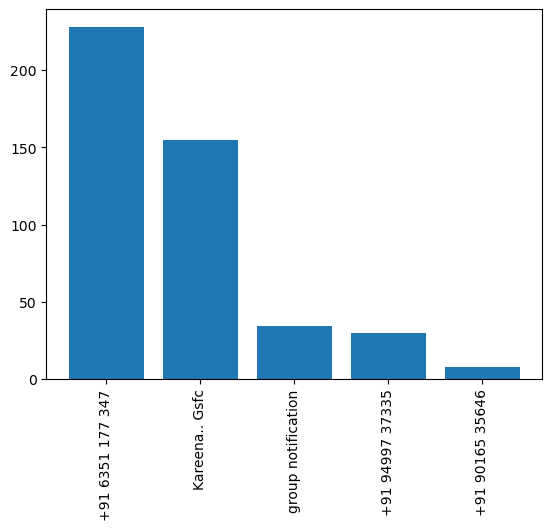

In [39]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
df[df['user'] == 'group notification']

,date,user,message,year,month,day,hour,minute
0,2022-08-12 14:12:00,group notification,Messages and calls are end-to-end encrypted. N...,2022,August,12,14,12
33,2022-09-05 11:13:00,group notification,+91 6351 177 347 added +91 94997 37335\n,2022,September,5,11,13
44,2022-09-07 12:37:00,group notification,+91 6351 177 347 deleted this group's icon\n,2022,September,7,12,37
55,2022-09-08 22:18:00,group notification,+91 6351 177 347 changed this group's icon\n,2022,September,8,22,18
71,2022-09-14 09:57:00,group notification,+91 6351 177 347 added +91 87349 18517\n,2022,September,14,9,57
72,2022-09-14 09:59:00,group notification,Jay Prajapati Gsfc joined using this group's i...,2022,September,14,9,59
73,2022-09-14 11:29:00,group notification,Mihir joined using this group's invite link\n,2022,September,14,11,29
82,2022-09-15 09:29:00,group notification,Kareena.. Gsfc added +91 70463 85425\n,2022,September,15,9,29
83,2022-09-15 09:30:00,group notification,Kareena.. Gsfc added +91 78740 43922\n,2022,September,15,9,30
95,2022-09-19 09:09:00,group notification,+91 6351 177 347 added Shreya Joshi GSFC\n,2022,September,19,9,9


In [41]:
df[df['user'] != 'group notification']

,date,user,message,year,month,day,hour,minute
1,2022-08-13 12:00:00,+91 6353 978 704,,2022,August,13,12,0
2,2022-08-13 12:08:00,+91 6351 177 347,This message was deleted\n,2022,August,13,12,8
3,2022-08-15 08:52:00,+91 6351 177 347,"Helloo everyone \nToday , there is flag hostin...",2022,August,15,8,52
4,2022-08-17 13:17:00,+91 6351 177 347,PARMAR JAIMIN PANKAJKUMAR\nPARMAR KOMALBEN ARV...,2022,August,17,13,17
5,2022-08-17 13:17:00,+91 6351 177 347,This message was deleted\n,2022,August,17,13,17
...,...,...,...,...,...,...,...,...
456,2023-02-13 16:00:00,+91 6351 177 347,Google meet code for *Ananta Launch Event* \ng...,2023,February,13,16,0
457,2023-02-15 12:26:00,Kareena.. Gsfc,*Hello Future Aspirants*\n\n*We are conducting...,2023,February,15,12,26
458,2023-02-16 17:50:00,+91 6351 177 347,1️⃣ Are you an *SY Engineering* student❓\n2️⃣ ...,2023,February,16,17,50
459,2023-02-16 17:50:00,+91 6351 177 347,<Media omitted>\n,2023,February,16,17,50


In [42]:
temp = df[df['user'] != 'group notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [43]:
words =[]
for message in df['message']:
    print(message)

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.


This message was deleted

Helloo everyone 
Today , there is flag hosting ceremony at Aanganva.

If it is possible for you…then attend the ceremony 

Msg by Shweta ma’am

PARMAR JAIMIN PANKAJKUMAR
PARMAR KOMALBEN ARVINDBHAI
PARTH A PATEL
PRAJAPATI PREETKUMAR HITESHKUMAR

This message was deleted

or call me asap

Msg from Hetal ma’am

Those who want to volunteer for run for tiranga contact Prajwal
Contact number:9427036889



<Media omitted>



<Media omitted>

www.msu-prerna.org

https://instagram.com/msu_prerna?igshid=YmMyMTA2M2Y=

Lab session in CP lab now

https://bit.ly/BMA_SYMP22_Registration

<Media omitted>

https://docs.google.com/forms/d/e/1FAIpQLScEjVdpSOl878DzYa6Zv_9qKTF6WBHtABzu5tqpGHSXuLkYMA/viewform

This message was deleted

Everyone register for this 
Msg from Shweta ma’am

Students whose faculty mentor is Swati Saxena ma'am  they

In [44]:
words =[]
for message in df['message']:
    print(message.split())

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.']
[]
['This', 'message', 'was', 'deleted']
['Helloo', 'everyone', 'Today', ',', 'there', 'is', 'flag', 'hosting', 'ceremony', 'at', 'Aanganva.', 'If', 'it', 'is', 'possible', 'for', 'you…then', 'attend', 'the', 'ceremony', 'Msg', 'by', 'Shweta', 'ma’am']
['PARMAR', 'JAIMIN', 'PANKAJKUMAR', 'PARMAR', 'KOMALBEN', 'ARVINDBHAI', 'PARTH', 'A', 'PATEL', 'PRAJAPATI', 'PREETKUMAR', 'HITESHKUMAR']
['This', 'message', 'was', 'deleted']
['or', 'call', 'me', 'asap']
['Msg', 'from', 'Hetal', 'ma’am']
['Those', 'who', 'want', 'to', 'volunteer', 'for', 'run', 'for', 'tiranga', 'contact', 'Prajwal', 'Contact', 'number:9427036889']
[]
[]
['<Media', 'omitted>']
[]
[]
['<Media', 'omitted>']
['www.msu-prerna.org']
['https://instagram.com/msu_prerna?igshid=YmMyMTA2M2Y=']
['Lab', 'session', 'in', 

In [45]:
words =[]
for message in df['message']:
    words.extend(message.split())

In [46]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'This',
 'message',
 'was',
 'deleted',
 'Helloo',
 'everyone',
 'Today',
 ',',
 'there',
 'is',
 'flag',
 'hosting',
 'ceremony',
 'at',
 'Aanganva.',
 'If',
 'it',
 'is',
 'possible',
 'for',
 'you…then',
 'attend',
 'the',
 'ceremony',
 'Msg',
 'by',
 'Shweta',
 'ma’am',
 'PARMAR',
 'JAIMIN',
 'PANKAJKUMAR',
 'PARMAR',
 'KOMALBEN',
 'ARVINDBHAI',
 'PARTH',
 'A',
 'PATEL',
 'PRAJAPATI',
 'PREETKUMAR',
 'HITESHKUMAR',
 'This',
 'message',
 'was',
 'deleted',
 'or',
 'call',
 'me',
 'asap',
 'Msg',
 'from',
 'Hetal',
 'ma’am',
 'Those',
 'who',
 'want',
 'to',
 'volunteer',
 'for',
 'run',
 'for',
 'tiranga',
 'contact',
 'Prajwal',
 'Contact',
 'number:9427036889',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'www.msu-prerna.org',
 'https://ins

In [47]:
words =[]
for message in df['message']:
    words.extend(message.split())

In [48]:
from collections import Counter

pd.DataFrame(Counter(words).most_common(20))



,0,1
0,to,147
1,the,140
2,<Media,92
3,omitted>,92
4,and,84
5,for,82
6,in,71
7,of,62
8,is,46
9,are,43


In [49]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
import emoji


In [51]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [ ]:
pd.DataFrame(Counetr(emojis).most_common(len(Counter(emojis))))

In [ ]:
import pandas as pd

list_emoji_found = {
 ':)': 12248,
 ':0': 88724,
 ':jabber:': 692,
 '8)': 719,
 ':-)': 351
}

#convert to series
s = pd.Series(list_emoji_found);
#convert to DataFrame
s = pd.DataFrame({'emoji':s.index, 'count':s.values})
s

In [ ]:
import emoji # Needs 'pip install emoji'

s['icons'] = s['emoji'].apply(lambda x: emoji.emojize(x))

In [ ]:
import pandas as pd

list_emoji_found = {
 ':)': 12248,
 ':heart:': 88724,
 ':relaxed:': 692,
 ':gun:': 719,
 ':-)': 351
}

s = pd.Series(list_emoji_found);
s = pd.DataFrame({'emoji':s.index, 'count':s.values})
s['icons'] = s['emoji'].apply(lambda x: emoji.emojize(x, use_aliases=True))
s

In [ ]:
words =[]
for message in df['message']:
    words.extend(message.split())

In [ ]:
import emoji

emojis = []
for message in df['message']:
    # Replace emojis with their textual representation
    message_text = emoji.demojize(message, delimiters=('', ''))
    # Extract all words that start and end with colons
    words = [word for word in message_text.split() if word.startswith(":") and word.endswith(":")]
    # Append the extracted words to the list of emojis
    emojis.extend(words)


In [ ]:
df['month_num'] = df['date'].dt.month

In [ ]:
df

In [ ]:
df.groupby(['year','month_num']).count()['message']

In [ ]:
df.groupby(['year','month_num']).count()['message'].reset_index()

In [ ]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [ ]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [ ]:
time

In [ ]:
timeline['time'] = time

In [ ]:
timeline

In [ ]:
import matplotlib.pyplot as plt
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show

In [ ]:
df['only_date'] = df['date'].dt.date

In [ ]:
df.groupby('only_date').count()['message']

In [ ]:
df.groupby('only_date').count()['message'].reset_index()

In [ ]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [ ]:
 df['day_name'] =df['date'].dt.day_name()

In [ ]:
df['day_name'].value_counts()

In [ ]:
df.head()

In [ ]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [ ]:
df['period'] = period

In [ ]:
df.sample(5)

In [ ]:
pip install seaborn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [ ]:
(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))

In [ ]:
import matplotlib as plt
mm = df[df['message'] == '<Media omitted>']
mm1 = mm['user'].value_counts()


plt.xlabel('user',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of media',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Top-10 media contributor of Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.plot()

plt.show()


In [ ]:
Luis Rafael Arce

In [ ]:
import os

In [ ]:
import streamlit as st
import pandas as pd
import re
from datetime import datetime
import os

# Set the path to the WhatsApp chat file
chat_file = "C:\Users\17805\Downloads\Document from ....txt"

# Define regular expressions to match the timestamp, sender, and message
timestamp_pattern = r'\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2} (AM|PM|am|pm)'
sender_pattern = r'\w+:'
message_pattern = r'[^\n]+'

# Read the chat file into a DataFrame
with open(chat_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []
for line in lines:
    timestamp_match = re.match(timestamp_pattern, line)
    if timestamp_match:
        timestamp = datetime.strptime(timestamp_match.group(), '%m/%d/%y, %I:%M %p')
        sender_match = re.search(sender_pattern, line)
        sender = sender_match.group()[:-1]
        message_match = re.search(message_pattern, line)
        message = message_match.group()
        media = None
        if "<Media omitted>" in message:
            media = True
        data.append((timestamp, sender, message, media))

df = pd.DataFrame(data, columns=["Timestamp", "Sender", "Message", "Media"])

# Group the messages by sender and count the number of messages and media messages
counts = df.groupby("Sender")["Message", "Media"].agg(["count", "sum"])
counts.columns = ["Messages", "Media"]

# Display the counts in the Streamlit app
st.write("Message counts by sender:")
st.write(counts)

# Get a list of all the media files in the chat directory
chat_directory = os.path.dirname(chat_file)
media_files = [f for f in os.listdir(chat_directory) if f.endswith(".jpg") or f.endswith(".png")]

# Display the media files in the Streamlit app
if media_files:
    st.write("Media files in the chat:")
    for media_file in media_files:
        media_path = os.path.join(chat_directory, media_file)
        st.image(media_path)
else:
    st.write("No media files in the chat.")
